In [213]:
## import csv file

import pandas as pd

read_file = pd.read_csv (r"C:\Users\SanjaHajdinjak\Temedica Dropbox\50_Products\Permea\03_Projects\Product_Development\Switches\df_switches_beginner.csv")

read_file


,Unnamed: 0,KUNDENNUMMER,ABGABEDATUM,ACTIVE_INGREDIENT,MEDICATION_GROUP,ALTERSGRUPPE
0,344705,0,2021-01-07,Dimethylfumarat,Mild/Moderate,46 - 55
1,601450,1,2022-04-06,Dimethylfumarat,Mild/Moderate,36 - 45
2,564021,2,2022-01-18,Glatirameracetat,Mild/Moderate,26 - 35
3,239794,5,2020-06-25,Glatirameracetat,Mild/Moderate,36 - 45
4,360925,5,2021-02-04,Interferon beta-1a,Mild/Moderate,36 - 45
...,...,...,...,...,...,...
30467,661900,78967,2022-07-01,Interferon beta-1b,Mild/Moderate,36 - 45
30468,476473,78971,2021-08-20,Teriflunomid,Mild/Moderate,26 - 35
30469,288399,78973,2020-10-05,Teriflunomid,Mild/Moderate,36 - 45
30470,420254,78977,2021-05-12,Glatirameracetat,Mild/Moderate,46 - 55


In [214]:
# count how many distinct values are in the column KUNDENNUMMER

unique = read_file['KUNDENNUMMER'].nunique()

#there are 25943 customers who have only one entry

In [215]:
# count the number of occurrences of each patient
patient_counts = read_file["KUNDENNUMMER"].value_counts()

num_patients_with_multiple_entries = (patient_counts > 1).sum()

print("Number of patients with more than one entry:", num_patients_with_multiple_entries)





Number of patients with more than one entry: 4529


In [216]:
## assume read_file is the data frame to be filtered

# find the duplicated KUNDENNUMMER values
duplicated_kundennummern = read_file[read_file.duplicated(subset='KUNDENNUMMER', keep=False)]['KUNDENNUMMER']

# keep only the rows with duplicated KUNDENNUMMER values
repreated_patients = read_file[read_file['KUNDENNUMMER'].isin(duplicated_kundennummern)]


# keep only the first row from rows that have a duplicate in the KUNDENNUMMER column
repreated_patients = repreated_patients.drop_duplicates(subset='KUNDENNUMMER', keep='first')



In [217]:
identical = read_file[read_file.duplicated(subset=['KUNDENNUMMER', 'ACTIVE_INGREDIENT'], keep=False)]

# there are no patients who have two medications listed and have stayed onn the first active ingredient?

In [218]:
# pivot the data into wide format with new columns for each entry
# this can be applied for cases when there are more than 2 entries

read_file['ABGABEDATUM'] = pd.to_datetime(read_file['ABGABEDATUM'])



read_file['idx'] = read_file.sort_values(by=['KUNDENNUMMER', 'ABGABEDATUM']).groupby('KUNDENNUMMER').cumcount()+1
pivoted = read_file.pivot_table(index=['KUNDENNUMMER'], columns='idx', 
                    values=['MEDICATION_GROUP', 'ACTIVE_INGREDIENT', 'ABGABEDATUM'], aggfunc='first')

pivoted = pivoted.sort_index(axis=1, level=1)
pivoted.columns = [f'{x}_{y}' for x,y in pivoted.columns]
pivoted = pivoted.reset_index()


print(pivoted)


       KUNDENNUMMER ABGABEDATUM_1 ACTIVE_INGREDIENT_1 MEDICATION_GROUP_1  \
0                 0    2021-01-07     Dimethylfumarat      Mild/Moderate   
1                 1    2022-04-06     Dimethylfumarat      Mild/Moderate   
2                 2    2022-01-18    Glatirameracetat      Mild/Moderate   
3                 5    2020-06-25    Glatirameracetat      Mild/Moderate   
4                15    2021-04-30          Fingolimod      Highly-active   
...             ...           ...                 ...                ...   
25938         78967    2022-07-01  Interferon beta-1b      Mild/Moderate   
25939         78971    2021-08-20        Teriflunomid      Mild/Moderate   
25940         78973    2020-10-05        Teriflunomid      Mild/Moderate   
25941         78977    2021-05-12    Glatirameracetat      Mild/Moderate   
25942         78981    2020-04-30          Fingolimod      Highly-active   

      ABGABEDATUM_2 ACTIVE_INGREDIENT_2 MEDICATION_GROUP_2  
0               NaT       

In [ ]:
# dates into date format for further analysis
pivoted['ABGABEDATUM_1'] = pd.to_datetime(pivoted['ABGABEDATUM_1'])
pivoted['ABGABEDATUM_2'] = pd.to_datetime(pivoted['ABGABEDATUM_2'])

In [219]:
with_switches = pivoted[pd.notnull(pivoted['ABGABEDATUM_2'])]
with_switches


,KUNDENNUMMER,ABGABEDATUM_1,ACTIVE_INGREDIENT_1,MEDICATION_GROUP_1,ABGABEDATUM_2,ACTIVE_INGREDIENT_2,MEDICATION_GROUP_2
3,5,2020-06-25,Glatirameracetat,Mild/Moderate,2021-02-04,Interferon beta-1a,Mild/Moderate
16,57,2020-04-20,Teriflunomid,Mild/Moderate,2021-09-29,Cladribin,Highly-active
17,60,2020-07-22,Interferon beta-1b,Mild/Moderate,2021-05-05,Dimethylfumarat,Mild/Moderate
20,75,2021-01-05,Glatirameracetat,Mild/Moderate,2021-11-17,Teriflunomid,Mild/Moderate
38,133,2020-10-19,Glatirameracetat,Mild/Moderate,2021-11-19,Teriflunomid,Mild/Moderate
...,...,...,...,...,...,...,...
25918,78918,2021-03-25,Interferon beta-1a,Mild/Moderate,2022-09-19,Ocrelizumab,Highly-active
25925,78929,2020-03-23,Glatirameracetat,Mild/Moderate,2021-11-09,Cladribin,Highly-active
25926,78930,2020-09-05,Dimethylfumarat,Mild/Moderate,2022-05-20,Diroximelfumarat,Mild/Moderate
25927,78934,2020-12-02,Dimethylfumarat,Mild/Moderate,2022-08-02,Diroximelfumarat,Mild/Moderate


In [220]:
# merge the data frames on the KUNDENNUMMER column
missing = pd.merge(with_switches, repreated_patients, on='KUNDENNUMMER')


# print non-merged entries based on dataset of origin
non_merged_switches = with_switches[~with_switches['KUNDENNUMMER'].isin(missing['KUNDENNUMMER'])]
non_merged_patients = repreated_patients[~repreated_patients['KUNDENNUMMER'].isin(missing['KUNDENNUMMER'])]

print('Non-merged entries from with_switches:')
print(non_merged_switches)

print('Non-merged entries from repreated_patients:')
print(non_merged_patients)

# there are 2 patients who have switched to a different medication but have not been recorded in the original data set
# this is because their second entry does not have a date, so it is not possible to determine how long they have been on the first medication


Non-merged entries from with_switches:
Empty DataFrame
Columns: [KUNDENNUMMER, ABGABEDATUM_1, ACTIVE_INGREDIENT_1, MEDICATION_GROUP_1, ABGABEDATUM_2, ACTIVE_INGREDIENT_2, MEDICATION_GROUP_2]
Index: []
Non-merged entries from repreated_patients:
       Unnamed: 0  KUNDENNUMMER ABGABEDATUM ACTIVE_INGREDIENT  \
17278      232299         44636  2020-06-15   Dimethylfumarat   
27841      435527         72112  2021-06-11  Glatirameracetat   

      MEDICATION_GROUP ALTERSGRUPPE  
17278    Mild/Moderate      36 - 45  
27841    Mild/Moderate         66 +  


In [221]:
# how many patients have swithced from a therapy type to another
combination_counts = pivoted.groupby(['MEDICATION_GROUP_1', 'MEDICATION_GROUP_2']).size().reset_index(name='count')
combination_counts

,MEDICATION_GROUP_1,MEDICATION_GROUP_2,count
0,Highly-active,Highly-active,487
1,Highly-active,Mild/Moderate,100
2,Mild/Moderate,Highly-active,1607
3,Mild/Moderate,Mild/Moderate,2335


In [234]:
# the average number of days between the two dates per switching combination
avg_days_medication_group = pivoted.groupby(['MEDICATION_GROUP_1', 'MEDICATION_GROUP_2'])['days_between'].mean().astype(int).reset_index()
avg_days_medication_group

# regardless of their initial medication, patients wait shorter if they switch to a mild medication than to a highlly potent one 

,MEDICATION_GROUP_1,MEDICATION_GROUP_2,days_between
0,Highly-active,Highly-active,435
1,Highly-active,Mild/Moderate,359
2,Mild/Moderate,Highly-active,403
3,Mild/Moderate,Mild/Moderate,289


In [222]:
# # how many patients have swithced from one active ingredient to another
combination_counts_active_ingredient = pivoted.groupby(['MEDICATION_GROUP_1', 'MEDICATION_GROUP_2', 'ACTIVE_INGREDIENT_1', 'ACTIVE_INGREDIENT_2']).size().astype(int).reset_index(name='count')
combination_counts_active_ingredient

,MEDICATION_GROUP_1,MEDICATION_GROUP_2,ACTIVE_INGREDIENT_1,ACTIVE_INGREDIENT_2,count
0,Highly-active,Highly-active,Cladribin,Fingolimod,1
1,Highly-active,Highly-active,Cladribin,Natalizumab,3
2,Highly-active,Highly-active,Cladribin,Ocrelizumab,12
3,Highly-active,Highly-active,Cladribin,Ofatumumab,12
4,Highly-active,Highly-active,Cladribin,Ozanimod,3
...,...,...,...,...,...
159,Mild/Moderate,Mild/Moderate,Teriflunomid,Diroximelfumarat,25
160,Mild/Moderate,Mild/Moderate,Teriflunomid,Glatirameracetat,49
161,Mild/Moderate,Mild/Moderate,Teriflunomid,Interferon beta-1a,11
162,Mild/Moderate,Mild/Moderate,Teriflunomid,Interferon beta-1b,2


In [224]:
# calculate the number of days between the two dates
pivoted['days_between'] = (pivoted['ABGABEDATUM_2'] - pivoted['ABGABEDATUM_1']).dt.days


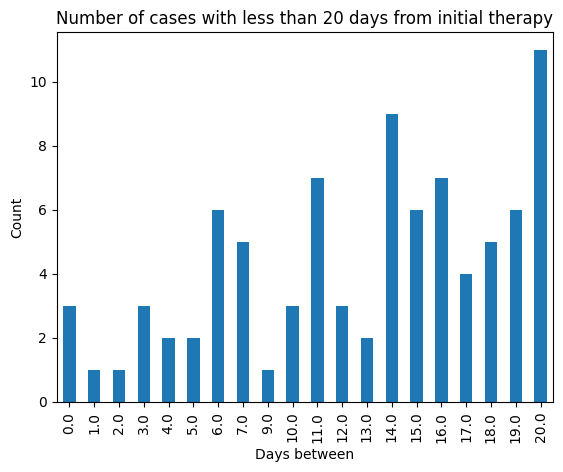

In [233]:
import matplotlib.pyplot as plt

# Filter the data to only include rows where "days_between" is less than 20
short_switch = pivoted[pivoted["days_between"] <= 20]

# Group the filtered data by the "days_between" column and count the number of occurrences of each value
counts = short_switch.groupby("days_between").size()

# Create a bar chart of the counts
counts.plot(kind="bar", xlabel="Days between", ylabel="Count", title="Number of cases with less than 20 days from initial therapy")
plt.show()

# there are some cases where switching happens in less than 20 days from the first prescription


In [226]:
# calculate the average number of days between the two dates per switching combination
avg_days = pivoted.groupby(['MEDICATION_GROUP_1', 'MEDICATION_GROUP_2', 'ACTIVE_INGREDIENT_1', 'ACTIVE_INGREDIENT_2'])['days_between'].mean().astype(int).reset_index()
avg_days

,MEDICATION_GROUP_1,MEDICATION_GROUP_2,ACTIVE_INGREDIENT_1,ACTIVE_INGREDIENT_2,days_between
0,Highly-active,Highly-active,Cladribin,Fingolimod,684
1,Highly-active,Highly-active,Cladribin,Natalizumab,592
2,Highly-active,Highly-active,Cladribin,Ocrelizumab,448
3,Highly-active,Highly-active,Cladribin,Ofatumumab,560
4,Highly-active,Highly-active,Cladribin,Ozanimod,490
...,...,...,...,...,...
159,Mild/Moderate,Mild/Moderate,Teriflunomid,Diroximelfumarat,289
160,Mild/Moderate,Mild/Moderate,Teriflunomid,Glatirameracetat,217
161,Mild/Moderate,Mild/Moderate,Teriflunomid,Interferon beta-1a,214
162,Mild/Moderate,Mild/Moderate,Teriflunomid,Interferon beta-1b,234


In [227]:
# variable concatenating the two active ingredients for hover text
avg_days['active_ingredient_concat'] = avg_days['ACTIVE_INGREDIENT_1'] + '->' + avg_days['ACTIVE_INGREDIENT_2']


In [228]:
# merging to get count and number of days between medication switches
merged_df = combination_counts_active_ingredient.merge(avg_days, on=['MEDICATION_GROUP_1', 'MEDICATION_GROUP_2', 'ACTIVE_INGREDIENT_1', 'ACTIVE_INGREDIENT_2'])


In [229]:
# add the number of days to the switching between medications information for hover text
merged_df['active_ingredient_concat_avg_days'] = merged_df['ACTIVE_INGREDIENT_1'] + '->' + merged_df['ACTIVE_INGREDIENT_2'] + '=' + merged_df['days_between'].astype(str) + ' days'


In [230]:
import plotly.graph_objects as go

# create sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node = dict(
        #pad = 40,
        #thickness = 50,
        #line = dict(color = "black", width = 0.9),
        #label = ["High", "Low", "Med 1", "Med 2", "Med 3"],
        #color = ["blue", "red", "green", "purple"]
        label = merged_df['MEDICATION_GROUP_1'].unique().tolist() + merged_df['MEDICATION_GROUP_2'].unique().tolist() + merged_df['ACTIVE_INGREDIENT_1'].unique().tolist() + merged_df['ACTIVE_INGREDIENT_2'].unique().tolist(),
        color = ["blue"] * len(merged_df['MEDICATION_GROUP_1'].unique().tolist()) + ["blue"] * len(merged_df['MEDICATION_GROUP_2'].unique().tolist()) 
        #+ ["green"] * len(merged_df['ACTIVE_INGREDIENT_1'].unique().tolist()) + ["purple"] * len(merged_df['ACTIVE_INGREDIENT_2'].unique().tolist())
    ),
    link = dict(
        #source = [0, 0, 2, 3, 4],
        #target = [2, 3, 4, 4, 1],
        #value = [1, 1, 1, 1, 2],
        source = merged_df['MEDICATION_GROUP_1'].map(lambda x: merged_df['MEDICATION_GROUP_1'].unique().tolist().index(x)).tolist() + merged_df['ACTIVE_INGREDIENT_1'].map(lambda x: merged_df['ACTIVE_INGREDIENT_1'].unique().tolist().index(x)+len(merged_df['MEDICATION_GROUP_1'].unique().tolist())).tolist(),
        target = merged_df['MEDICATION_GROUP_2'].map(lambda x: len(merged_df['MEDICATION_GROUP_1'].unique().tolist()) + merged_df['MEDICATION_GROUP_2'].unique().tolist().index(x)).tolist() + merged_df['ACTIVE_INGREDIENT_2'].map(lambda x: len(merged_df['MEDICATION_GROUP_1'].unique().tolist()) + len(merged_df['MEDICATION_GROUP_2'].unique().tolist()) + merged_df['ACTIVE_INGREDIENT_2'].unique().tolist().index(x)).tolist(),
        value = merged_df['count'].tolist(),
        customdata = merged_df['active_ingredient_concat_avg_days'].tolist(),
        hovertemplate='Count: %{value:.2f}<br>From %{source.label} to %{target.label}<br>From %{customdata}<extra></extra>',
    )
)])

# update layout with title and font
fig.update_layout(title_text="Active Ingredient Switching by Medication Group", font=dict(size=12),
                  width=1000,
                  height=1000,)

# display the plot
fig.show()


## Sankey where switches to Natalizumab are in a different colour

In [231]:
import plotly.graph_objects as go

# create sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        label=merged_df['MEDICATION_GROUP_1'].unique().tolist() + merged_df['MEDICATION_GROUP_2'].unique().tolist() + merged_df['ACTIVE_INGREDIENT_1'].unique().tolist() + merged_df['ACTIVE_INGREDIENT_2'].unique().tolist(),
                color = ["lightsteelblue"] * len(merged_df['MEDICATION_GROUP_1'].unique().tolist()) + ["lightsteelblue"] * len(merged_df['MEDICATION_GROUP_2'].unique().tolist()) 
    ),
    link=dict(
        source=merged_df['MEDICATION_GROUP_1'].map(lambda x: merged_df['MEDICATION_GROUP_1'].unique().tolist().index(x)).tolist() + merged_df['ACTIVE_INGREDIENT_1'].map(lambda x: merged_df['ACTIVE_INGREDIENT_1'].unique().tolist().index(x)+len(merged_df['MEDICATION_GROUP_1'].unique().tolist())).tolist(),
        target=merged_df['MEDICATION_GROUP_2'].map(lambda x: len(merged_df['MEDICATION_GROUP_1'].unique().tolist()) + merged_df['MEDICATION_GROUP_2'].unique().tolist().index(x)).tolist() + merged_df['ACTIVE_INGREDIENT_2'].map(lambda x: len(merged_df['MEDICATION_GROUP_1'].unique().tolist()) + len(merged_df['MEDICATION_GROUP_2'].unique().tolist()) + merged_df['ACTIVE_INGREDIENT_2'].unique().tolist().index(x)).tolist(),
        value=merged_df['count'].tolist(),
        customdata=merged_df['active_ingredient_concat_avg_days'].tolist(),
        hovertemplate='Count: %{value:.2f}<br>From %{source.label} to %{target.label}<br>From %{customdata}<extra></extra>',
        color=[ 'blue' if merged_df['ACTIVE_INGREDIENT_2'][i] == 'Natalizumab' else 'lightgrey' for i in range(len(merged_df))]
    )
)])

# update layout with title and font
fig.update_layout(
    title_text="Active Ingredient Switching by Medication Group and Active Ingredient", 
    font=dict(size=12),
    width=1000,
    height=1000,
)

# display the plot
fig.show()
